# <center> Advanced Digital Agriculture (DS/AS 875) <center> Module 01 - Data Analysis (Lab 02)
***
# Table of Contents
* [READING THE DATASET INTO PYTHON](#READING-THE-DATASET-INTO-PYTHON)
* [PART I. LOOK AT YOUR DATA!](#PART-I.-LOOK-AT-YOUR-DATA!)
    * [Editing Dataset](#Editing-Dataset)
    * [Data Visualization](#Data-Visualization)
* [PART II. CORRELATION](#PART-II.-CORRELATION)
* [PART III. REGRESSION](#PART-III.-REGRESSION)
    * [Linear Regression](#Linear-Regression)
    * [ANOVA](#ANOVA)
    * [Leave-one-out cross-validation](#Leave-one-out-cross-validation)
***   

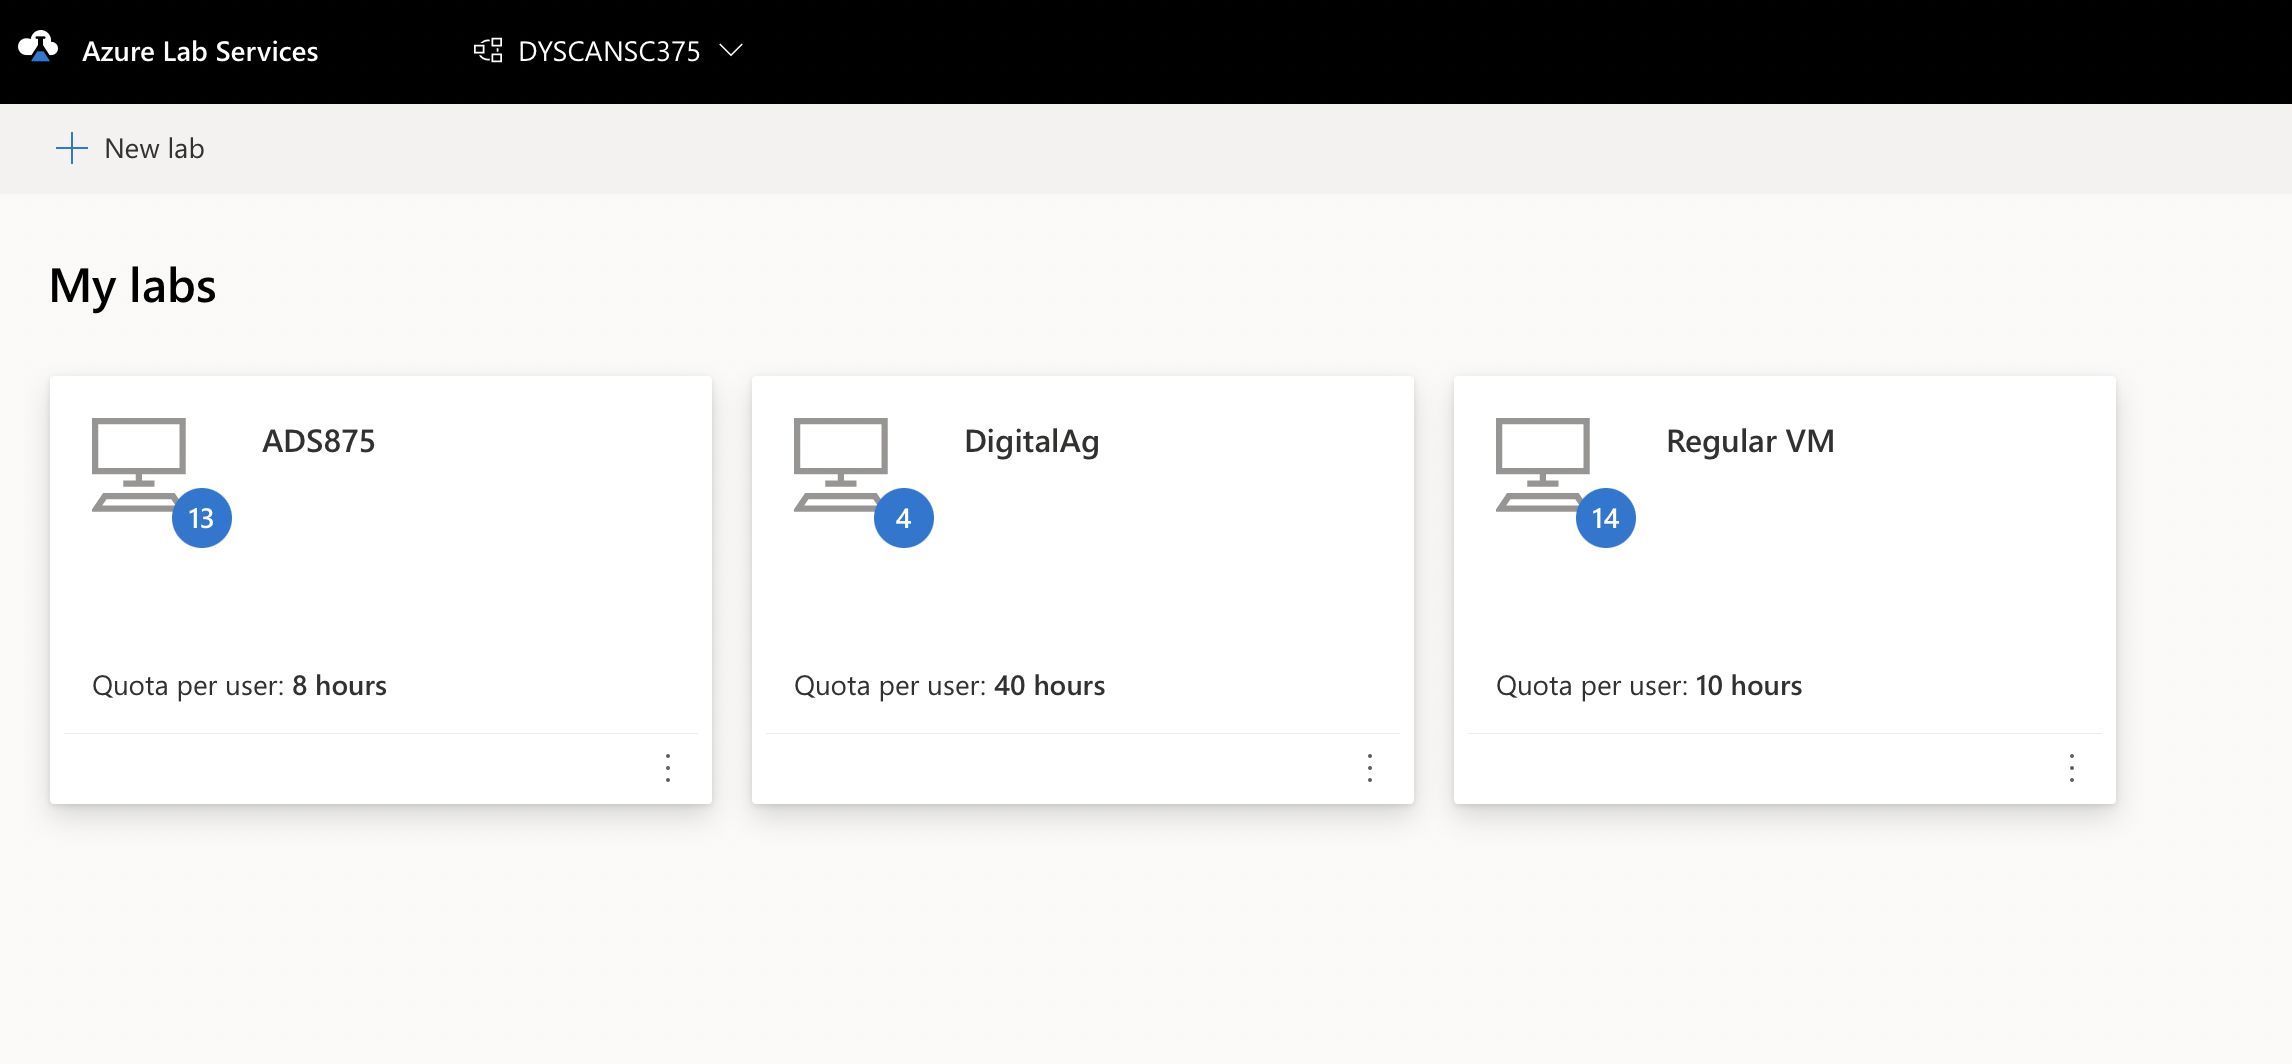

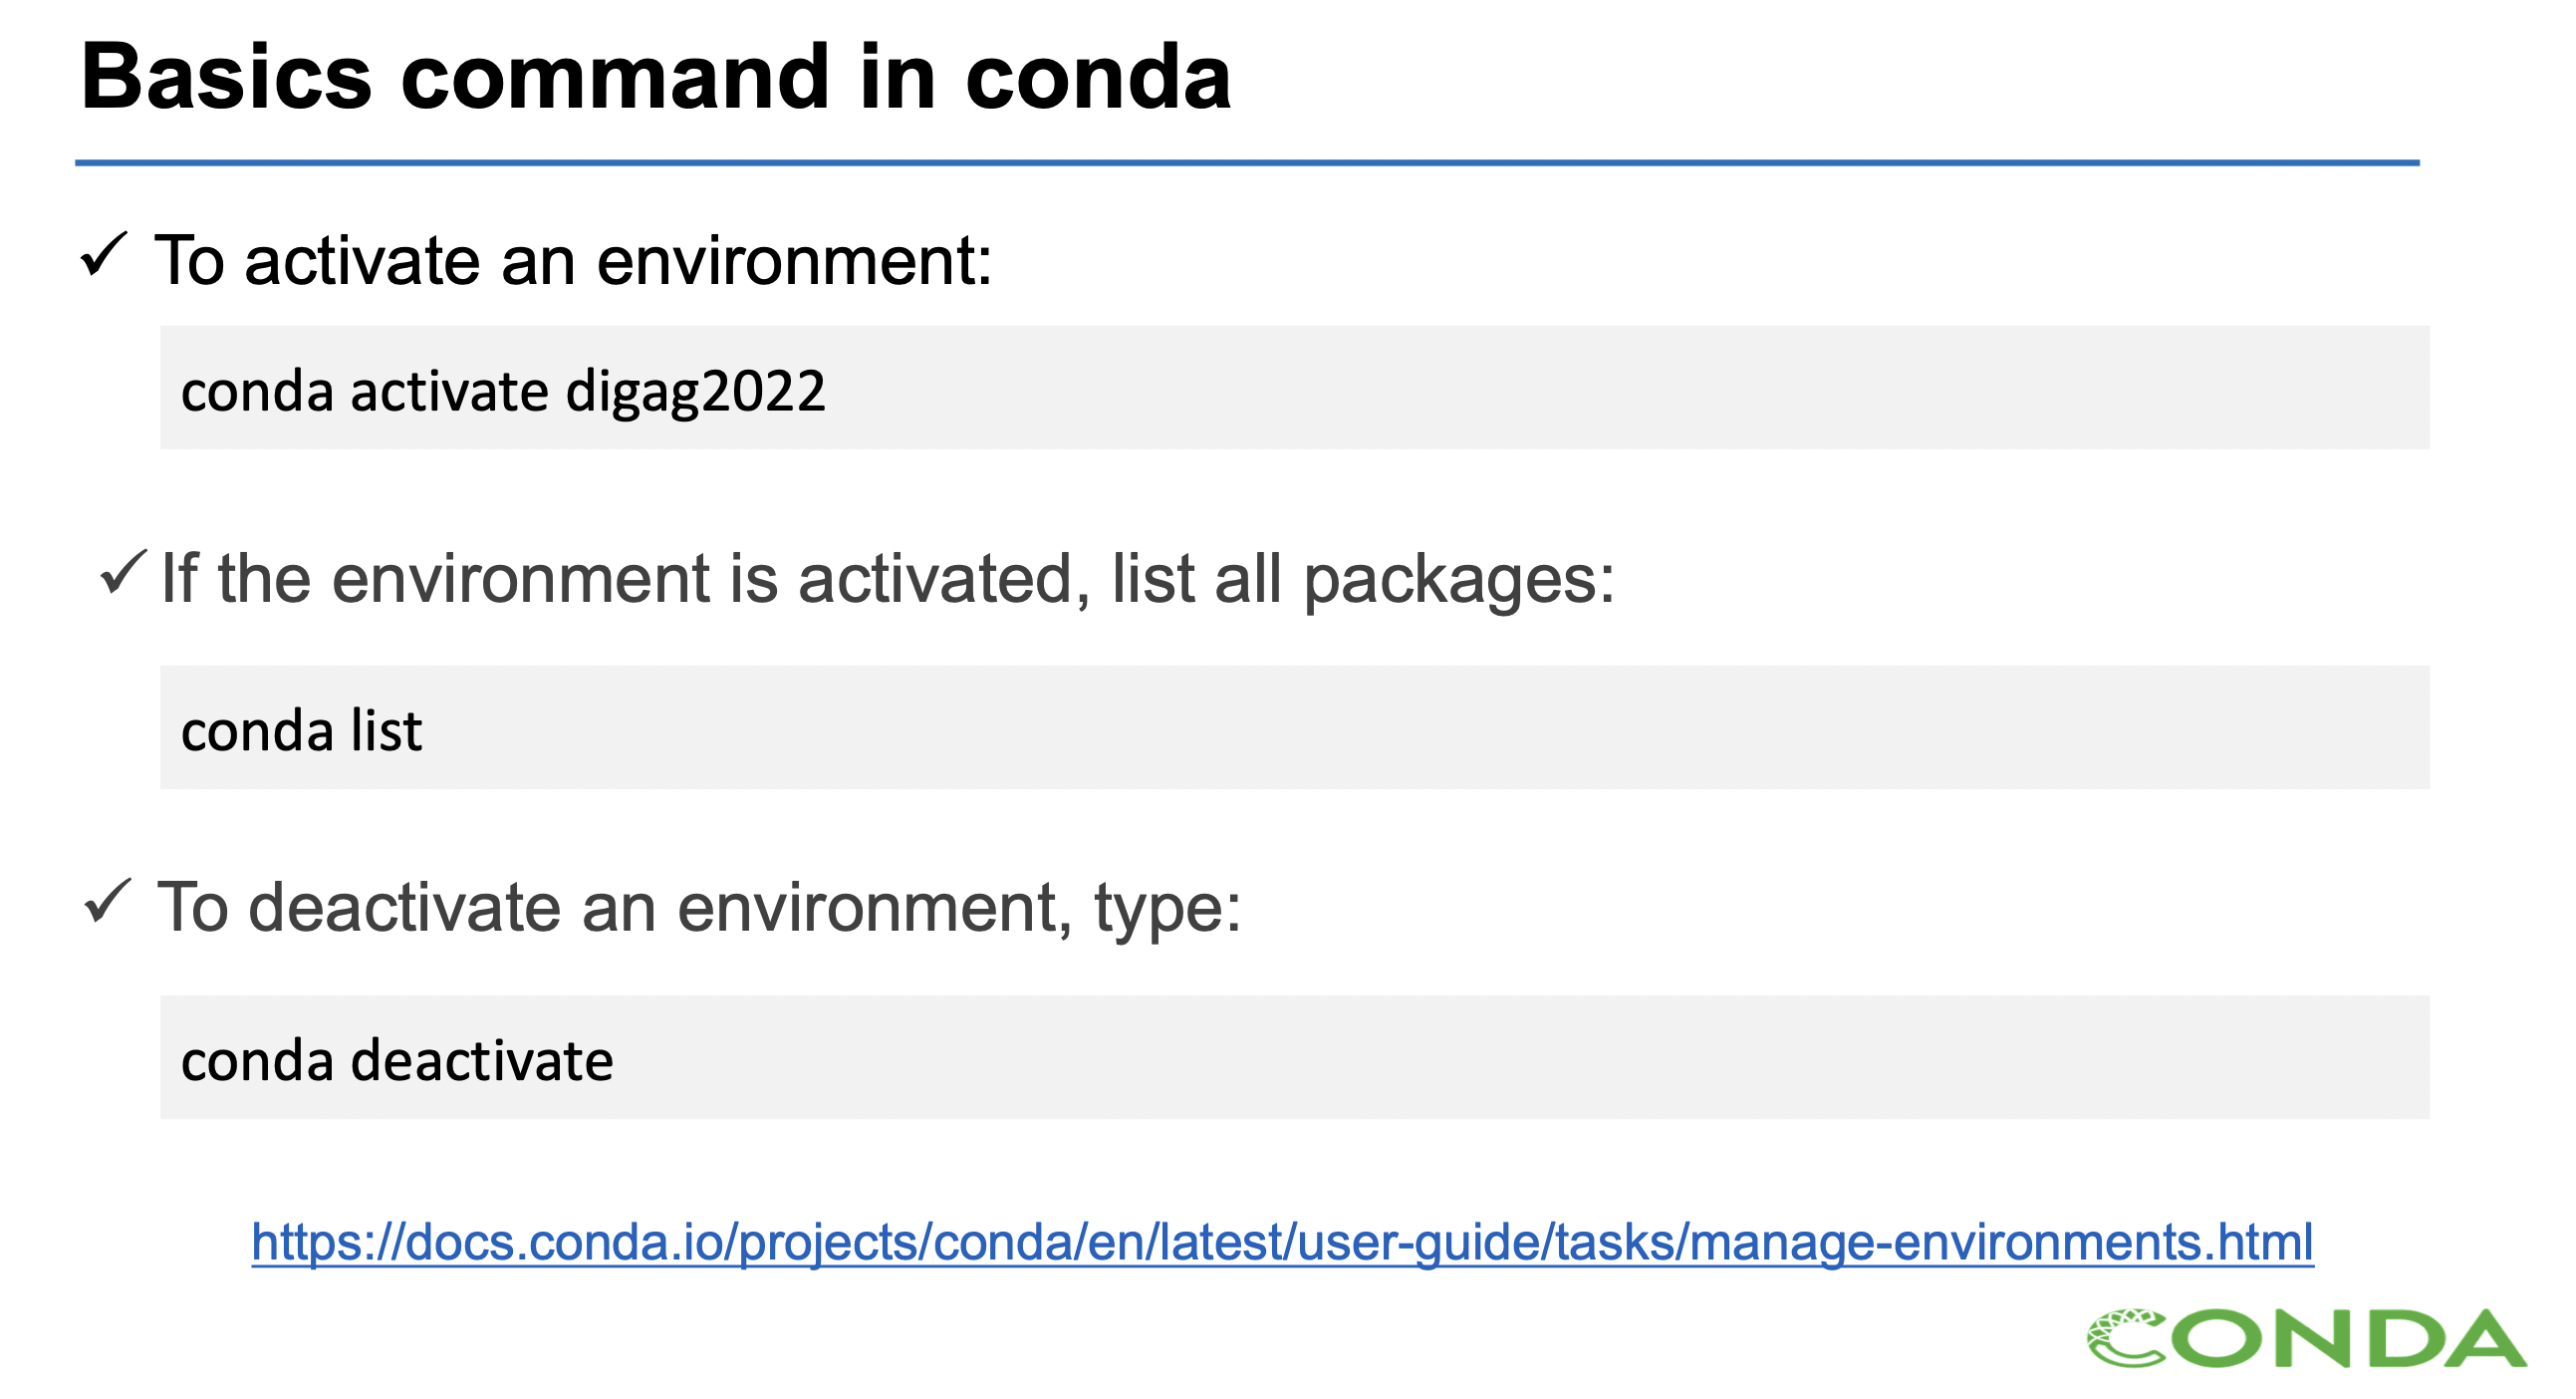

## READING THE DATASET INTO PYTHON

In [ ]:
import pandas as pd
cowdata = pd.read_csv("CullDairyCow_Data.csv")
cowdata

## PART I. LOOK AT YOUR DATA!
* Data inconsistencies, errors
* Data distribution: symmetry, kurtosis, etc.
* Outliers (discrepant observations), redundancies
* Descriptive analysis (summary values and plots)

### Editing Dataset

In [ ]:
# Frequency for number of lactations
cowdata["lact"].value_counts(sort=True, ascending=False)

In [ ]:
# Lactation number 6 or higher lumped together into a single class (6)
cowdata.loc[cowdata.lact > 6, "lact"] = 6

In [ ]:
# Frequency for number of lamness cases
cowdata["lameness"].value_counts(sort=True, ascending=False)

In [ ]:
# Number of lamness cases larger than 4 lumped together into a single class (4)
cowdata.loc[cowdata.lameness > 4, "lameness"] = 4

In [ ]:
# Frequency for number of lamness cases
cowdata["mastitis"].value_counts(sort=True, ascending=False)

In [ ]:
# Number of mastitis cases larger than 4 lumped together into a single class (4)
cowdata.loc[cowdata.mastitis > 4, "mastitis"] = 4

### Data Visualization
#### Making histograms for numerical variables

In [ ]:
hist = cowdata.hist(column=["price", "BW", "305ME"], figsize=(16, 4), layout=(1, 3), sharey=True, grid=False)

#### Box-Plot graphs

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Price distribution by season
bp = cowdata.boxplot(column=["price"], by=["season"], figsize=(6, 6), grid=False)

In [ ]:
# Price distribution by lactation number
bp = cowdata.boxplot(column=["price"], by=["lact"], figsize=(6, 6), grid=False)

In [ ]:
# Price distribution by Calving Ease
bp = cowdata.boxplot(column=["price"], by=["calvingEase"], figsize=(6, 6), grid=False)

In [ ]:
# Price distribution by number of lameness cases
bp = cowdata.boxplot(column=["price"], by=["lameness"], figsize=(6, 6), grid=False)

In [ ]:
# Price distribution by number of mastitis cases
bp = cowdata.boxplot(column=["price"], by=["mastitis"], figsize=(6, 6), grid=False)

In [ ]:
# Price distribution by culling reason
bp = cowdata.boxplot(column=["price"], by=["reason"], figsize=(6, 6), grid=False, rot=45)

In [ ]:
# Price distribution by lactation stage
bp = cowdata.boxplot(column=["price"], by=["lactStage"], figsize=(6, 6), grid=False)

### PART II. CORRELATION
Creating a subset of the data set with only numerical variables to calculate Pearson Correlation

In [ ]:
cowdata[["305ME", "price", "BW"]].corr()

### PART III. REGRESSION

### Linear Regression
Using `statsmodel` package to fit a linear model. Adding `C()` around each variable name to converts it into a categorical variable during analysis

In [ ]:
from statsmodels.formula.api import ols
cowdata = cowdata.rename(columns={"305ME": "x305ME"}) # Rename column so it doesn't start with a digit
lm = ols('price ~ C(season) + C(lact) + C(calvingEase) + C(lameness) + C(mastitis) + C(reason) + C(lactStage) + x305ME + BW',
               data=cowdata).fit()
print(lm.summary())

#### ANOVA

In [ ]:
import statsmodels.api as sm
table = sm.stats.anova_lm(lm, typ=1)
print(table)

### Leave-one-out cross-validation

In [ ]:
import numpy as np
n = len(cowdata) # number of rows in the dataset
formula = 'price ~ C(season) + C(lact) + C(calvingEase) + C(lameness) + C(mastitis) + C(reason) + C(lactStage) + x305ME + BW'
yhat = []
for i in range(n): # loop through each row, and train with all other rows
    train_data = cowdata.copy()
    validation_data = cowdata.iloc[i:i+1]
    train_data = train_data.drop(labels=i)
    lm = ols(formula, data=train_data).fit()
    yhat.append(lm.predict(validation_data).iloc[0])
yhat = np.array(yhat)
ygnd = cowdata[["price"]].values.squeeze()
mse = np.sum((ygnd - yhat)**2) / n
mae = np.sum(abs(ygnd - yhat)) / n
corr = np.corrcoef(yhat, ygnd)  
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"Pearson correlation coefficient: {corr[0][1]}")

In [ ]:
import matplotlib.pyplot as plt
plt.plot(yhat, ygnd, 'o')
m, b = np.polyfit(yhat, ygnd, 1)
plt.plot(yhat, m*yhat + b)